Processing stimulas_1.csv


KeyboardInterrupt: 

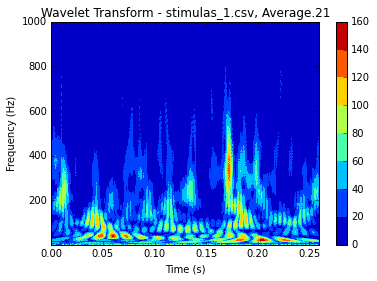

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import os
import pandas as pd

# Set the plotting style
plt.style.use('classic')

# Sampling rate
sampling_rate = 2000

# Wavelet parameters
wavename = 'morl'
totalscal = 1000
fc = pywt.central_frequency(wavename)
cparam = 2 * fc * totalscal
scales = cparam / np.arange(1, totalscal + 1)

# Fixed folder path containing subfolders (s1, s2, s3, etc.)
input_folder_path = r'D:\ML_models_paper\Ninapro\Ninapro_DB4\Final Processed Data'

# Create a directory to save the images
output_directory = 'wavelet_images'
os.makedirs(output_directory, exist_ok=True)

# Initialize a set to keep track of processed file names
processed_files = set()

# Iterate over subfolders (s1, s2, s3, etc.) within the input folder
for subfolder_name in os.listdir(input_folder_path):
    subfolder_path = os.path.join(input_folder_path, subfolder_name)

    if not os.path.isdir(subfolder_path):
        continue  # Skip if it's not a folder

    # Create a subfolder in the output_directory
    output_subfolder = os.path.join(output_directory, subfolder_name)
    os.makedirs(output_subfolder, exist_ok=True)

    # Loop through each CSV file in the subfolder
    for csv_filename in os.listdir(subfolder_path):
        if csv_filename.endswith('.csv'):
            image_filename = f'{csv_filename}_Wavelet_Image.jpg'
            image_filepath = os.path.join(output_subfolder, image_filename)

            # Check if the image file already exists in the output folder
            if os.path.isfile(image_filepath):
                print(f"Skipping {csv_filename}. Image already exists.")  # Debugging statement
                continue

            print(f"Processing {csv_filename}")  # Debugging statement

            csv_filepath = os.path.join(subfolder_path, csv_filename)

            # Read the CSV file into a DataFrame
            df = pd.read_csv(csv_filepath)

            # Use only the first 10 odd-numbered columns for wavelet transform
            columns_for_wavelet = df.columns[::2][:10]  # Selecting every other odd column, maximum 10 columns

            # If there are no columns to process, skip to the next file
            if len(columns_for_wavelet) == 0:
                print(f"No suitable columns found in {csv_filename}. Skipping.")  # Debugging statement
                continue

            # Perform wavelet transform for each selected column
            for column_name in columns_for_wavelet:
                data = df[column_name]

                # Perform wavelet transform
                [cwtmatr, frequencies] = pywt.cwt(data, scales, wavename, 1.0 / sampling_rate)

                # Create an image
                fig = plt.figure()
                plt.contourf(np.arange(len(data)) / sampling_rate, frequencies, abs(cwtmatr))
                plt.ylabel("Frequency (Hz)")
                plt.xlabel("Time (s)")
                plt.colorbar()
                plt.title(f'Wavelet Transform - {csv_filename}, {column_name}')

                filepath = os.path.join(output_subfolder, f'{csv_filename}_{column_name}_Wavelet_Image.jpg')
                os.makedirs(os.path.dirname(filepath), exist_ok=True)  # Create subdirectories as needed
                fig.savefig(filepath, bbox_inches='tight')
                plt.close()

                # Add the processed file name to the set
                processed_files.add(image_filename)

print('Wavelet transform completed. Images are saved in the "wavelet_images" folder.')


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import os
import pandas as pd

# Set the plotting style
plt.style.use('classic')

# Sampling rate
sampling_rate = 2000

# Wavelet parameters
wavename = 'morl'
totalscal = 1000
fc = pywt.central_frequency(wavename)
cparam = 2 * fc * totalscal
scales = cparam / np.arange(1, totalscal + 1)

# Fixed folder path containing subfolders (s1, s2, s3, etc.)
input_folder_path = r'D:\ML_models_paper\Ninapro\Ninapro_DB4\Final Processed Data'

# Create a directory to save the images
output_directory = 'wavelet_images'
os.makedirs(output_directory, exist_ok=True)

# Iterate over subfolders (s1, s2, s3, etc.) within the input folder
for subfolder_name in os.listdir(input_folder_path):
    subfolder_path = os.path.join(input_folder_path, subfolder_name)

    if not os.path.isdir(subfolder_path):
        continue  # Skip if it's not a folder

    # Check if the subfolder has already been processed
    output_subfolder = os.path.join(output_directory, subfolder_name)
    if os.path.exists(output_subfolder):
        print(f"Skipping {subfolder_name}. Folder already processed.")
        continue

    # Create a subfolder in the output_directory
    os.makedirs(output_subfolder, exist_ok=True)

    # Loop through each CSV file in the subfolder
    for csv_filename in os.listdir(subfolder_path):
        if csv_filename.endswith('.csv'):
            image_filename = f'{csv_filename}_Wavelet_Image.jpg'
            image_filepath = os.path.join(output_subfolder, image_filename)

            # Check if the image file already exists in the output folder
            if os.path.isfile(image_filepath):
                print(f"Skipping {csv_filename}. Image already exists.")  # Debugging statement
                continue

            print(f"Processing {csv_filename}")  # Debugging statement

            csv_filepath = os.path.join(subfolder_path, csv_filename)

            # Read the CSV file into a DataFrame
            df = pd.read_csv(csv_filepath)

            # Use only the first 10 odd-numbered columns for wavelet transform
            columns_for_wavelet = df.columns[::2][:10]  # Selecting every other odd column, maximum 10 columns

            # If there are no columns to process, skip to the next file
            if len(columns_for_wavelet) == 0:
                print(f"No suitable columns found in {csv_filename}. Skipping.")  # Debugging statement
                continue

            # Perform wavelet transform for each selected column
            for column_name in columns_for_wavelet:
                data = df[column_name]

                # Perform wavelet transform
                [cwtmatr, frequencies] = pywt.cwt(data, scales, wavename, 1.0 / sampling_rate)

                # Create an image
                fig = plt.figure()
                plt.contourf(np.arange(len(data)) / sampling_rate, frequencies, abs(cwtmatr))
                plt.ylabel("Frequency (Hz)")
                plt.xlabel("Time (s)")
                plt.colorbar()
                plt.title(f'Wavelet Transform - {csv_filename}, {column_name}')

                filepath = os.path.join(output_subfolder, f'{csv_filename}_{column_name}_Wavelet_Image.jpg')
                os.makedirs(os.path.dirname(filepath), exist_ok=True)  # Create subdirectories as needed
                fig.savefig(filepath, bbox_inches='tight')
                plt.close()

                # Add the processed file name to the set
                processed_files.add(image_filename)

print('Wavelet transform completed. Images are saved in the "wavelet_images" folder.')


Skipping s1. Folder already processed.
Skipping s10. Folder already processed.
Skipping s2. Folder already processed.
Processing stimulas_1.csv
Processing stimulas_10.csv


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import os
import pandas as pd

# Set the plotting style
plt.style.use('classic')

# Sampling rate
sampling_rate = 2000

# Wavelet parameters
wavename = 'morl'
totalscal = 1000
fc = pywt.central_frequency(wavename)
cparam = 2 * fc * totalscal
scales = cparam / np.arange(1, totalscal + 1)

# Fixed parent folder path containing subfolders
parent_folder_path = r'D:\ML_models_paper\Ninapro\Ninapro_DB4\Final Processed Data'

# Create a directory to save the images
output_directory = 'wavelet_images'
os.makedirs(output_directory, exist_ok=True)

# Prompt the user to enter the name of the subfolder to process
subfolder_name = input("Enter the name of the subfolder to process: ")

# Construct the path to the specified subfolder
subfolder_path = os.path.join(parent_folder_path, subfolder_name)

# Check if the specified subfolder exists
if not os.path.isdir(subfolder_path):
    print("Specified subfolder does not exist.")
    exit()

# Create a subfolder in the output_directory
output_subfolder = os.path.join(output_directory, subfolder_name)
os.makedirs(output_subfolder, exist_ok=True)

# Loop through each CSV file in the specified subfolder
for csv_filename in os.listdir(subfolder_path):
    if csv_filename.endswith('.csv'):
        image_filename = f'{csv_filename}_Wavelet_Image.jpg'
        image_filepath = os.path.join(output_subfolder, image_filename)

        # Check if the image file already exists in the output folder
        if os.path.isfile(image_filepath):
            print(f"Skipping {csv_filename}. Image already exists.")  # Debugging statement
            continue

        print(f"Processing {csv_filename}")  # Debugging statement

        csv_filepath = os.path.join(subfolder_path, csv_filename)

        # Read the CSV file into a DataFrame
        df = pd.read_csv(csv_filepath)

        # Use only the first 10 odd-numbered columns for wavelet transform
        columns_for_wavelet = df.columns[::2][:10]  # Selecting every other odd column, maximum 10 columns

        # If there are no columns to process, skip to the next file
        if len(columns_for_wavelet) == 0:
            print(f"No suitable columns found in {csv_filename}. Skipping.")  # Debugging statement
            continue

        # Perform wavelet transform for each selected column
        for column_name in columns_for_wavelet:
            data = df[column_name]

            # Perform wavelet transform
            [cwtmatr, frequencies] = pywt.cwt(data, scales, wavename, 1.0 / sampling_rate)

            # Create an image
            fig = plt.figure()
            plt.contourf(np.arange(len(data)) / sampling_rate, frequencies, abs(cwtmatr))
            plt.ylabel("Frequency (Hz)")
            plt.xlabel("Time (s)")
            plt.colorbar()
            plt.title(f'Wavelet Transform - {csv_filename}, {column_name}')

            filepath = os.path.join(output_subfolder, f'{csv_filename}_{column_name}_Wavelet_Image.jpg')
            os.makedirs(os.path.dirname(filepath), exist_ok=True)  # Create subdirectories as needed
            fig.savefig(filepath, bbox_inches='tight')
            plt.close()

print('Wavelet transform completed. Images are saved in the "wavelet_images" folder.')


Processing stimulas_1.csv
Processing stimulas_10.csv
Processing stimulas_11.csv
Processing stimulas_12.csv
Processing stimulas_13.csv
Processing stimulas_14.csv
Processing stimulas_15.csv
Processing stimulas_16.csv
Processing stimulas_17.csv
Processing stimulas_18.csv
Processing stimulas_19.csv
Processing stimulas_2.csv
Processing stimulas_20.csv
Processing stimulas_21.csv
Processing stimulas_22.csv
Processing stimulas_23.csv
Processing stimulas_24.csv
Processing stimulas_25.csv
Processing stimulas_26.csv
Processing stimulas_27.csv
Processing stimulas_28.csv
Processing stimulas_29.csv
Processing stimulas_3.csv
Processing stimulas_30.csv
Processing stimulas_31.csv
Processing stimulas_32.csv
Processing stimulas_33.csv
Processing stimulas_34.csv
Processing stimulas_35.csv
Processing stimulas_36.csv
Processing stimulas_37.csv
Processing stimulas_38.csv
Processing stimulas_39.csv
Processing stimulas_4.csv
Processing stimulas_40.csv
Processing stimulas_41.csv
Processing stimulas_42.csv
Proce

In [11]:
import os
from PIL import Image

# Input parent folder path containing the image subfolders
parent_folder_path = r'D:\ML_models_paper\Ninapro\Ninapro_DB4\wavelet_images'  # Replace with your parent folder path

# Get the subfolder name from user input
subfolder_name = input("Enter the name of the subfolder containing images to crop: ")

# Input folder path containing the images to crop
input_folder_path = os.path.join(parent_folder_path, subfolder_name)

# Create the output folder for cropped images
output_parent_folder_path = 'cropped_images'
os.makedirs(output_parent_folder_path, exist_ok=True)

# Output folder path to save the cropped images
output_folder_path = os.path.join(output_parent_folder_path, subfolder_name)
os.makedirs(output_folder_path, exist_ok=True)

# Flag to indicate if we've processed the first image
first_image_processed = False

# Loop through each image in the input folder
for image_filename in os.listdir(input_folder_path):
    if image_filename.endswith('.jpg'):
        # Construct the input and output file paths
        input_image_path = os.path.join(input_folder_path, image_filename)
        output_image_path = os.path.join(output_folder_path, image_filename)

        # Open the input image
        img = Image.open(input_image_path)

        # Define the cropping box (adjust these values as needed)
        left = 83  # Adjust the left cropping margin
        top = 35   # Adjust the top cropping margin
        right = img.width - 105  # Adjust the right cropping margin
        bottom = img.height - 57  # Adjust the bottom cropping margin

        # Crop the image
        cropped_img = img.crop((left, top, right, bottom))

        # Save the cropped image to the output folder
        cropped_img.save(output_image_path)

        print(f"Cropped and saved: {output_image_path}")

        # Set the flag to indicate that we've processed the first image
        first_image_processed = True

# Check if no images were found in the input folder
if not first_image_processed:
    print("No images found in the input folder.")


Cropped and saved: cropped_images\s10\stimulas_1.csv_Average.11_Wavelet_Image.jpg
Cropped and saved: cropped_images\s10\stimulas_1.csv_Average.12_Wavelet_Image.jpg
Cropped and saved: cropped_images\s10\stimulas_1.csv_Average.13_Wavelet_Image.jpg
Cropped and saved: cropped_images\s10\stimulas_1.csv_Average.15_Wavelet_Image.jpg
Cropped and saved: cropped_images\s10\stimulas_1.csv_Average.16_Wavelet_Image.jpg
Cropped and saved: cropped_images\s10\stimulas_1.csv_Average.17_Wavelet_Image.jpg
Cropped and saved: cropped_images\s10\stimulas_1.csv_Average.18_Wavelet_Image.jpg
Cropped and saved: cropped_images\s10\stimulas_1.csv_Average.19_Wavelet_Image.jpg
Cropped and saved: cropped_images\s10\stimulas_1.csv_Average.20_Wavelet_Image.jpg
Cropped and saved: cropped_images\s10\stimulas_1.csv_Average.21_Wavelet_Image.jpg
Cropped and saved: cropped_images\s10\stimulas_10.csv_Average.7417_Wavelet_Image.jpg
Cropped and saved: cropped_images\s10\stimulas_10.csv_Average.7418_Wavelet_Image.jpg
Cropped an

In [13]:
#create new folder
os.mkdir('cropped_images_sorted')


In [23]:
import os
import shutil

# Define paths
input_folder = r"D:\ML_models_paper\Ninapro\Ninapro_DB4\cropped_images"
output_folder = "sorted_images"

# Create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Create subfolders stim1, stim2, ..., stim52
for i in range(1, 53):
    stim_folder = os.path.join(output_folder, f"stim{i}")
    os.makedirs(stim_folder)

# Iterate over subfolders in the input folder
for subdir, _, files in os.walk(input_folder):
    # Sort files alphabetically
    files.sort()
    # Initialize a dictionary to store files for each stimulus number
    stimulus_files = {}
    # Iterate over files in subfolder
    for file in files:
        # Extract stimulus number from the filename
        if file.startswith("stimulas_"):
            stimulus_num = int(file.split("_", 1)[1].split(".")[0])
            # Store the file in the corresponding stimulus number dictionary
            if stimulus_num not in stimulus_files:
                stimulus_files[stimulus_num] = []
            stimulus_files[stimulus_num].append(file)
    # Iterate over stimulus files
    for stimulus_num, files in stimulus_files.items():
        # Determine the corresponding stim folder
        stim_folder = os.path.join(output_folder, f"stim{stimulus_num}")
        # Copy the files to the appropriate stim folder
        for file in files:
            src_file = os.path.join(subdir, file)
            dst_file = os.path.join(stim_folder, file)
            shutil.copy(src_file, dst_file)


In [24]:
import os
import shutil

def main():
    input_folder = r"D:\ML_models_paper\Ninapro\Ninapro_DB4\cropped_gestures\s1"

    # Check if the input folder exists
    if not os.path.isdir(input_folder):
        print(f"The input folder '{input_folder}' does not exist.")
        return

    # Get a list of image files in the input folder
    image_files = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    # Sort the image files lexicographically by name
    image_files.sort()

    # Create a new folder to copy images
    output_folder_base = os.path.join(input_folder, 'sorted_images')
    os.makedirs(output_folder_base, exist_ok=True)

    # Copy images in groups of 10 to newly created folders
    for i in range(0, len(image_files), 10):
        output_folder = os.path.join(output_folder_base, f'batch_{i//10+1}')
        os.makedirs(output_folder, exist_ok=True)
        for img_file in image_files[i:i+10]:
            shutil.copy(os.path.join(input_folder, img_file), output_folder)

    print("Images sorted and copied successfully!")

if __name__ == "__main__":
    main()


Images sorted and copied successfully!
